In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import lines
import math

essence = pd.read_csv('datasets/essence.txt')

Calcule moyenne, variance et ecart-type de l'echantillon

In [2]:
xbar = np.mean(essence['conso'])
print('moyenne:',round(xbar,2))

sprime2 = np.var(essence['conso'],ddof=1)
print('variance:',round(sprime2,2))

sprime = np.std(essence['conso'],ddof=1)
print('ecart-type:',round(sprime,2))

moyenne: 31.45
variance: 4.66
ecart-type: 2.16


In [3]:
# variance biaisée = ne prenant pas en compte la taille de m'echantillon
n_essence = len(essence)
v = np.var(essence['conso'])
print('variance biaisée:',round(v,2))

variance biaisée: 4.63


Histogramme de la valeurs consommation avec:
* moyenne empirique 
* seuil "métier"

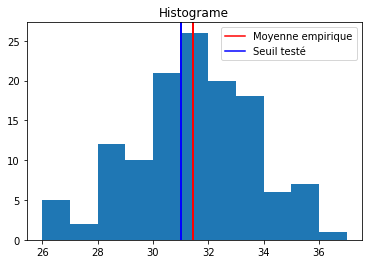

In [4]:
mu0 = 31

plt.hist(essence['conso'],bins=range(26,38))
plt.title('Histograme')
# moyenne empirique
plt.axvline(xbar, color='r', linewidth=2)
# seuile métier
plt.axvline(mu0, color='b',linewidth=2)
plt.legend(handles=[lines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique"),
                    lines.Line2D([], [], color='blue',markersize=15, label=u"Seuil testé")])
plt.show()

Taux de guérison

In [5]:
guerison = pd.read_csv('datasets/guerison.txt')

In [6]:
n_guerison = len(guerison)
n_guerison_gueris = np.sum(guerison.loc[guerison['guerison'] == 1]['guerison'])

p_estim = n_guerison_gueris/n_guerison
print('proportion gueris:',round(p_estim,2),'%')

proportion gueris: 0.77 %


In [7]:
alpha = 0.05

from scipy.stats import norm

icinf = p_estim - norm.ppf(1-alpha/2)*math.sqrt(p_estim*(1-p_estim)/n_guerison)
icsup = p_estim + norm.ppf(1-alpha/2)*math.sqrt(p_estim*(1-p_estim)/n_guerison)

print('Intervalle de confiance =',100*(1-alpha),'%')
print("Borne inférieure =",round(icinf,3))
print("Borne supérieure =",round(icsup,3))

Intervalle de confiance = 95.0 %
Borne inférieure = 0.717
Borne supérieure = 0.829


95% de chance que le taux de guérison soit compris entre 0.717 et 0.829.

In [8]:
# proportion_confint du package statsmodel.stats.proportion effectue le calcul 

alpha = 0.10 # intervalle de confiance de 90%

from statsmodels.stats.proportion import proportion_confint

icinf, icsup = proportion_confint(n_guerison_gueris,n_guerison, alpha=alpha, method='normal')
print('Intervalle de confiance =',100*(1-alpha),'%')
print("Borne inférieure =",round(icinf,3))
print("Borne supérieure =",round(icsup,3))

Intervalle de confiance = 90.0 %
Borne inférieure = 0.726
Borne supérieure = 0.82


Remarquons ici que l’hypothèse gaussienne n’était pas obligatoire ici, en effet l’échantillon est de taille suffisamment importante (supérieure à 30).


In [9]:
import scipy
alpha = 0.05 # intervalle de confiance de 95%


icinf=xbar-scipy.stats.t.ppf(1-alpha/2,n_essence-1)*sprime/math.sqrt(n_essence)
icsup=xbar+scipy.stats.t.ppf(1-alpha/2,n_essence-1)*sprime/math.sqrt(n_essence)
print("Borne inférieure =",round(icinf,3))
print("Borne supérieure =",round(icsup,3))

Borne inférieure = 31.072
Borne supérieure = 31.827


IC sur variance: 

In [10]:
icinf = (n_essence-1)*sprime2/scipy.stats.chi2.ppf(1-alpha/2,n_essence-1)
icsup = (n_essence-1)*sprime2/scipy.stats.chi2.ppf(alpha/2,n_essence-1)
print("Borne inférieure =",round(icinf,3))
print("Borne supérieure =",round(icsup,3))

Borne inférieure = 3.701
Borne supérieure = 6.064
